<a href="https://colab.research.google.com/github/srujana-koripalli/DM-DimensionalityTechniques-/blob/main/DM_Assignment_2_TabularDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [4]:
covariance_matrix = np.cov(transformed_df.T)

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [6]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [8]:
pca = PCA()
pca = pca.fit(transformed_df)

In [9]:
pca = pca.fit(transformed_df)

In [10]:
explained_variance = pca.explained_variance_ratio_

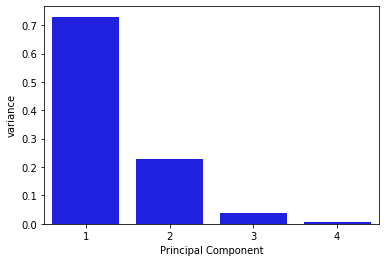

In [11]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(4)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

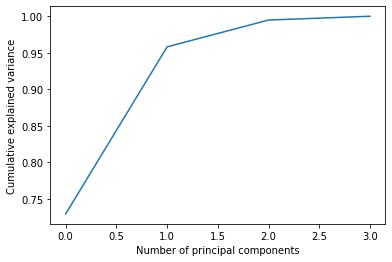

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [13]:
pca_2 = PCA(n_components =4)
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X)

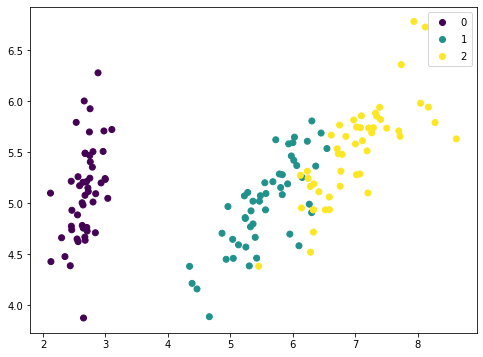

In [14]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y)
plt.legend(*scatter.legend_elements())

**SVD**

In [15]:
u, s, v = np.linalg.svd(X, full_matrices=True)

Text(0, 0.5, 'Percent of the variance explained')

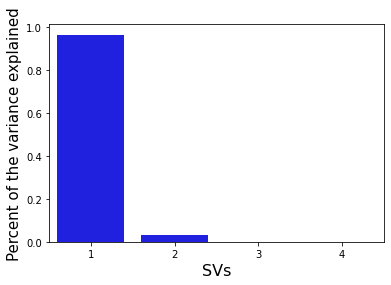

In [16]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [17]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090


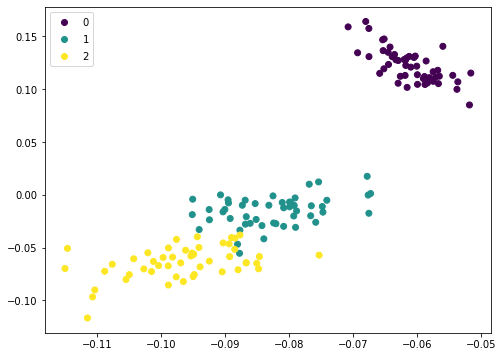

In [18]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

**t-SNE**

In [19]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.643433
[t-SNE] KL divergence after 300 iterations: 2.293295


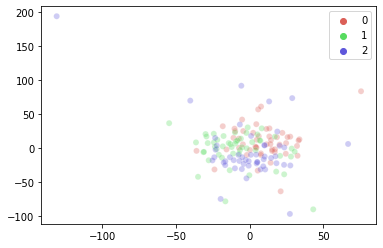

In [20]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)

**ISO MAP**

In [21]:
from sklearn import manifold, datasets

In [22]:
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [23]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()


,X,Y,label
0,-3.309251,-0.252219,0
1,-3.819231,-0.279292,0
2,-3.815531,-0.280693,0
3,-3.642930,-0.253199,0
4,-3.398217,-0.253639,0


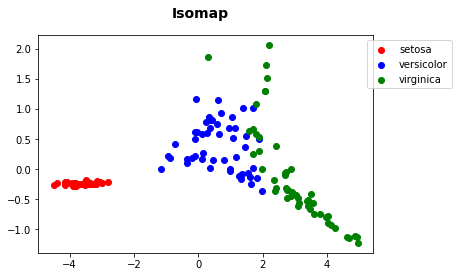

In [24]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

**LLE**

In [25]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)

In [26]:
X_transformed = embedding.fit_transform(X)

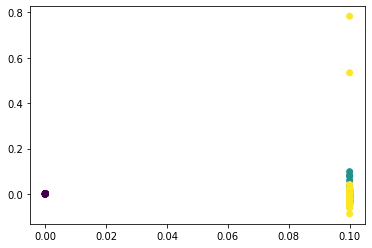

In [27]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

**Conclusion: In the above all the techniques PCA, SVD, ISOMAP shows the data clearly, But not LLE and TSNE **